Perceptrón
=========================
Es la red neuronal más simple, está comformada por:
* Varias entradas $X$
* Varios pesos $W$ correspondientes a $X$
* Una suma ponderada entre $X$ y $W$
* Una función de activación
* Una salida. 

<center>

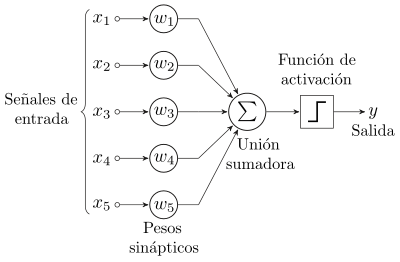

</center>

En conjunto, estos perceptrones forman un modelo multicapa conocido como red neuronal artificial. 

<center>

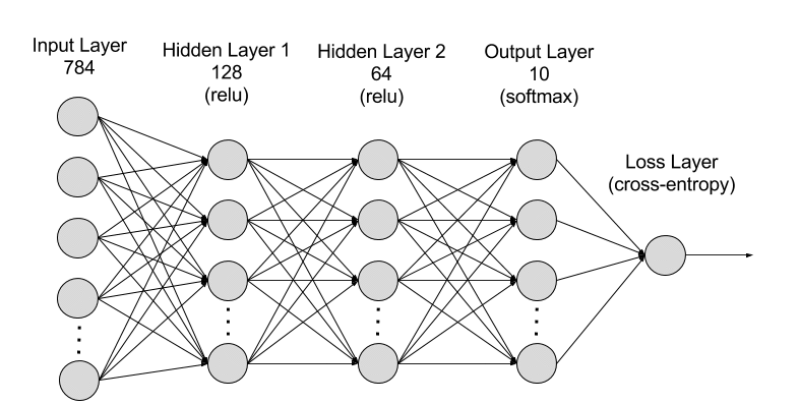

</center>

Función de activación
=========================
Una de las principales componentes de los modelos de redes neuronales son las funciones de activación ya que estas deciden qué tanto se activa una neurona. Las más comunes son:

<center>

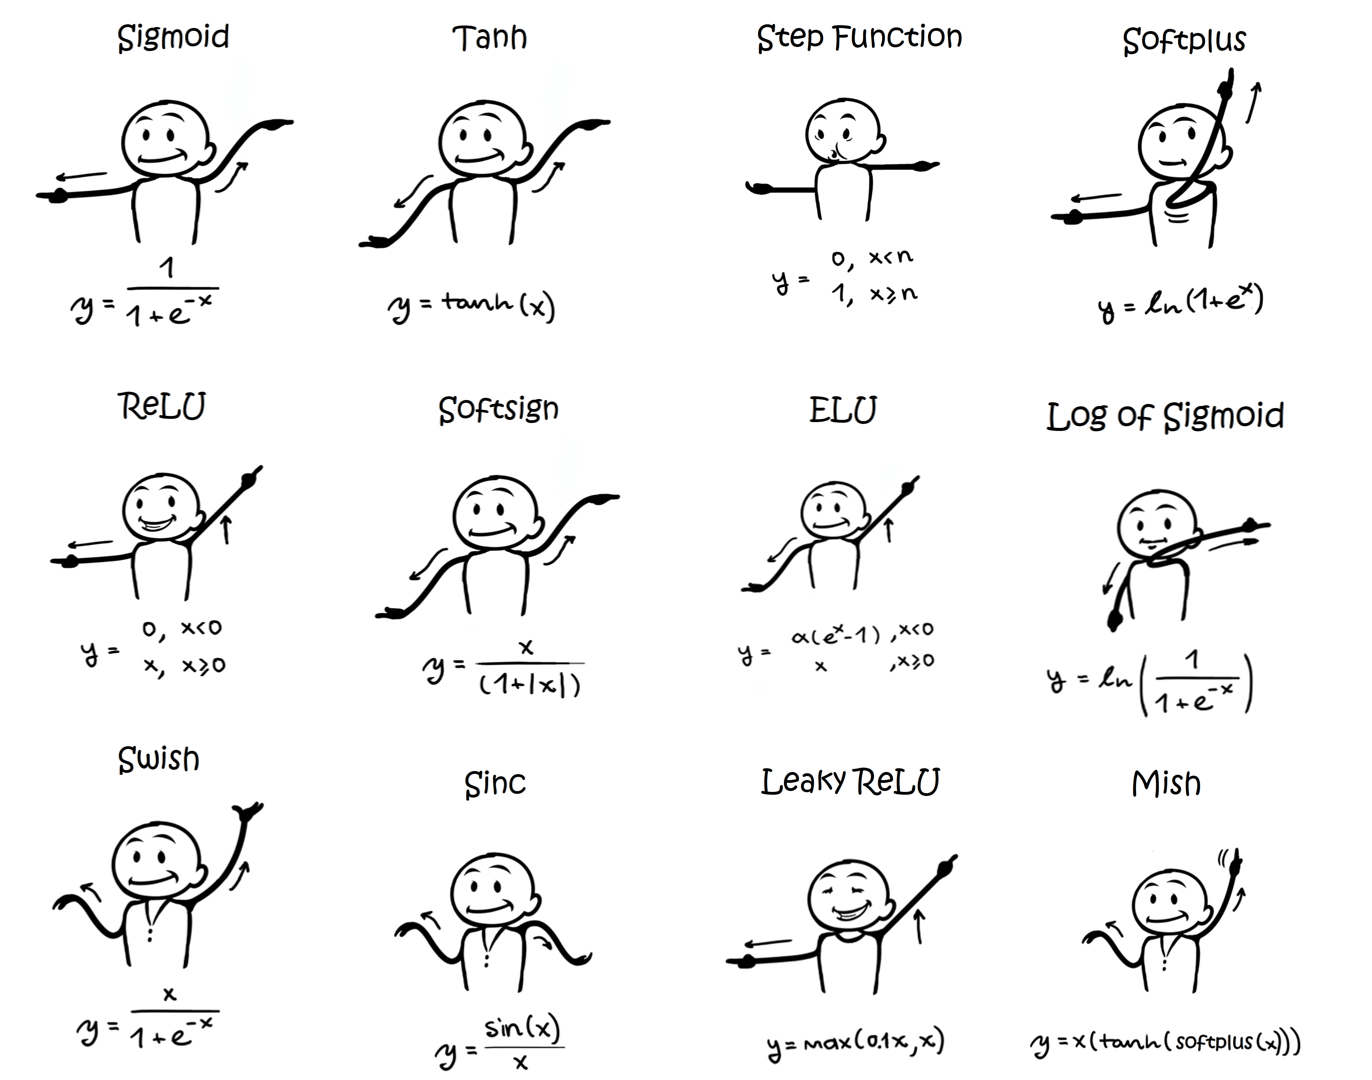

</center>

Algoritmo
=========================
Se initializan aleatoriamente pesos y durante n iteraciones (también llamadas como épocas) se calculan las salidas para cada dato del conjunto de entrenamiento, multiplicando cada entrada por sus respectivos pesos y pasando el valor en la función de activación. Después los pesos se actualizan mediante backpropagation y descenso del gradiente.

<center>

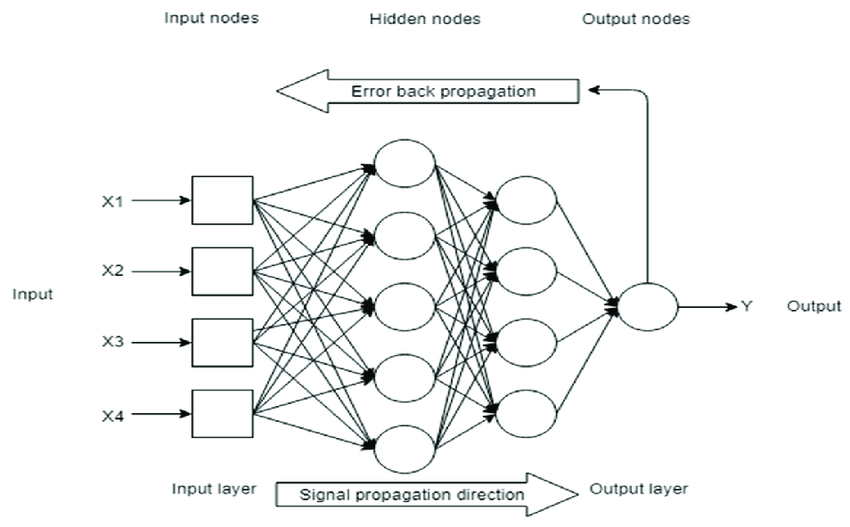

</center>

Descenso del gradiente
=========================
La idea de este algoritmo es minimizar una función según la direción hacia la cual decrese. Para ello se obtiene el vector opuesto al gradiente $\nabla f = [..., \frac{\partial f}{\partial z_i}, ...]$. En el caso de las redes neuronales, se utilizan otros dos parámetros para realizar esta minimización:

* Tasa de aprendizaje $\eta$, es el tamaño de los pasos que damos en cada iteración para cambiar los pesos.
* Función de pérdida, es el error total que tienen las predicciones respecto al valor real, se suele utilizar el SSE $E = \frac{1}{2} \Sigma[y-\hat{y}]$.

Para actualizar los pesos, aplicamos la fórmula $w_i = w_i + \eta\nabla f(x_i)$.

<center>

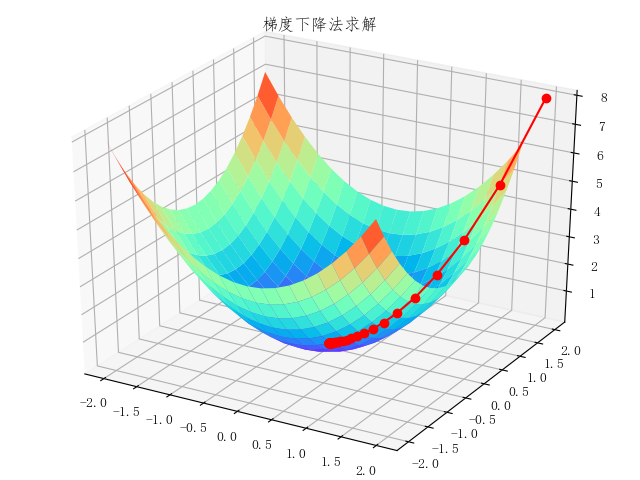

</center>

Existen distintas variantes del algorimo como lo son el SGD (que selecciona aleatoriamente una muestra en el dataset) y el BGD (utiliza las muestras de todos los puntos del dataset), y un punto medio conocido como MBGD (selecciona n muestras)

<center>

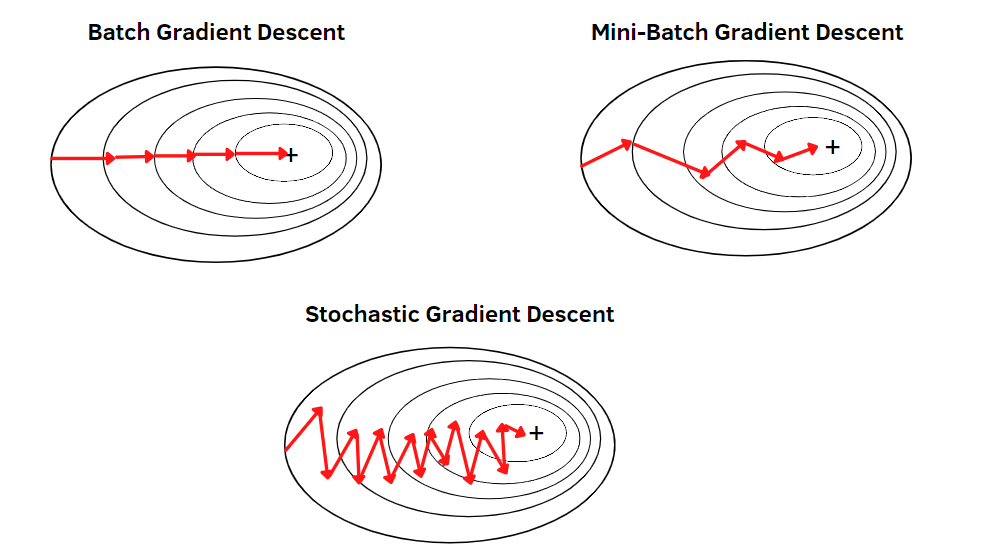

</center>

Dropout
=========================
Es una técnica que se utiliza para evitar el sobreajuste de los modelos. Consiste en apagar aleatoriamente algunas neuronas durante el entrenamiento. Esto se logra mediante la eliminación de las conexiones entre las neuronas de una capa y las de la siguiente. 

<center>

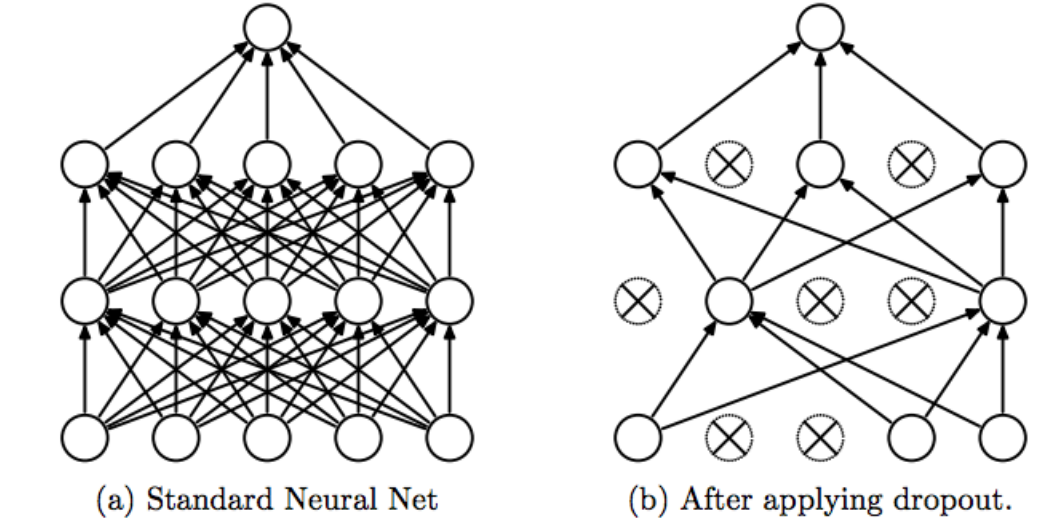

</center>

Implementación
=========================

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importamos el dataset
dataset = pd.read_csv('./datasets/Churn_Modelling.csv')
X = dataset.iloc[:, 3:13].values
Y = dataset.iloc[:, 13].values

In [2]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

# Codificamos la variable categórica Geography
ct = ColumnTransformer([('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
X = X[:, 1:]

# Codificamos la variable categórica Gender
le = LabelEncoder()
X[:, 3] = le.fit_transform(X[:, 3])

# Escalamos las variables
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

# Dividimos el dataset en conjunto de entrenamiento y conjunto de prueba
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [3]:
# Activamos el uso de la GPU
import tensorflow as tf
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [4]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Inicializamos la ANN
classifier = Sequential()

# Añadimos la capa de entrada y la primera capa oculta
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))

# Dropout para evitar el sobreajuste
classifier.add(Dropout(rate = 0.1))

# Añadimos la segunda capa oculta
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

# Dropout para evitar el sobreajuste
classifier.add(Dropout(rate = 0.1))

# Añadimos la capa de salida
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compilamos la ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Epoch 1/100
800/800 [==============================] - 13s 2ms/step - loss: 0.5618 - accuracy: 0.7994
Epoch 2/100
800/800 [==============================] - 2s 2ms/step - loss: 0.4279 - accuracy: 0.8064
Epoch 3/100
800/800 [==============================] - 2s 2ms/step - loss: 0.4300 - accuracy: 0.8005
Epoch 4/100
800/800 [==============================] - 2s 2ms/step - loss: 0.4374 - accuracy: 0.7960
Epoch 5/100
800/800 [==============================] - 2s 2ms/step - loss: 0.4388 - accuracy: 0.7899
Epoch 6/100
800/800 [==============================] - 2s 2ms/step - loss: 0.4378 - accuracy: 0.7908
Epoch 7/100
800/800 [==============================] - 2s 2ms/step - loss: 0.4247 - accuracy: 0.8019
Epoch 8/100
800/800 [==============================] - 2s 2ms/step - loss: 0.4381 - accuracy: 0.8191
Epoch 9/100
800/800 [==============================] - 2s 2ms/step - loss: 0.4299 - accuracy: 0.8247
Epoch 10/100
800/800 [==============================] - 2s 2ms/step - loss: 0.4240 - accur

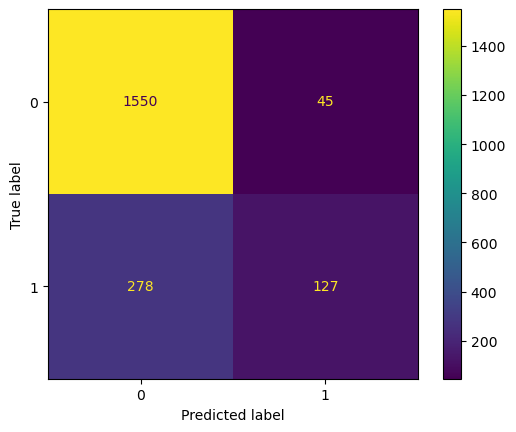

In [5]:
# Entrenamos la ANN con el conjunto de entrenamiento
classifier.fit(X_train, Y_train, batch_size = 10, epochs = 100)

# Predicción de los resultados con el conjunto de prueba
Y_pred = classifier.predict(X_test)
Y_pred = (Y_pred > 0.5)

# Elaboramos una matriz de confusión
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(Y_test, Y_pred)
ConfusionMatrixDisplay(cm).plot()

Referencias:

https://aprendeia.com/que-es-el-perceptron-simple-y-multicapa/

https://es.khanacademy.org/math/multivariable-calculus/applications-of-multivariable-derivatives/optimizing-multivariable-functions/a/what-is-gradient-descent

https://keepcoding.io/blog/funcion-de-activacion-en-deep-learning/